## Algorytm PageRank (ogolna zasada)

Algorytm PageRank służył do oceny jakości stron internetowych w celu ich indeksowania i przedstawiania wyników hasła zadanego przez użytkownika.

W celu wyliczenia wartości z zakresu 0-1, która określa wagę strony, algorytm łączy informacje z dwóch komponentów:

- Informacje które były charakterystyczne dla zapytania wydanego przez użytkownika. Oceniana jest jak trafna jest treść strony w kontekści zapytania użytkownika.

- Informacje, które nie były związane z zapytaniem wydanym przez użytkownika. W tym aspekcie oceniana jest waga strony w kontekści liczby odsłon, odnośników od niej i sąsiedztwa.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

### Tworzenie grafu reprezentującego relacje między stronami

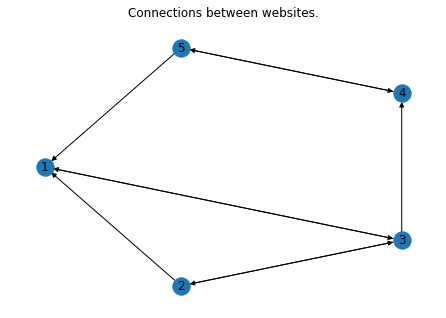

In [2]:
myWeb = nx.DiGraph()

myPages = range(1, 5) # Reprezentacja stron jako liczby od 1 do 5

connections = [(1, 3), (2, 1), (2, 3), (3, 1), (3, 2), (3, 4), (4, 5), (5, 1), (5, 4)]

myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)

pos=nx.shell_layout(myWeb)

nx.draw(myWeb, pos, arrows=True, with_labels=True)
plt.title("Connections between websites.")
plt.show()

Tworzymy funkcję, która z naszego grafu stworzy nam tablicę prawdopodobieństw przejścia z jednej strony do innej.

In [49]:
def createPageRank(aGraph):
    nodes_set = len(aGraph) # Liczba nodów
    M = nx.to_numpy_array(aGraph) # Funkcja ktora tworzy nam tablice przejsc dla grafu
    
    outwards = M.sum(axis=1) # Sumujemy po wierszach naszą tablice aby dostać ile połączeń jest dla danego noda

    prob_outwards = np.array(
        [1.0/count if count > 0 else 0.0 for count in outwards]
    )

    G = M.T @ np.diag(prob_outwards) # Mnożymy każdą kolumnę przez odpowiednie prawdopodobieństwo
    p = np.ones(nodes_set) / float(nodes_set)

    if np.min(np.sum(G, axis=0)) < 1.0:
        print("Ostzezenie!!!")
    
    return G, p

Tworzymy tablice polaczen w grafie

In [50]:
G, p = createPageRank(myWeb)
print(G)

[[0.         0.5        0.33333333 0.         0.5       ]
 [0.         0.         0.33333333 0.         0.        ]
 [1.         0.5        0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.5       ]
 [0.         0.         0.         1.         0.        ]]
